# Streamageddon
Spotify's armageddon investments and data science meet
## Preprocessing (positive dataset)

In [31]:
%pip install --quiet pandas==2.3.2 wordcloud==1.9.4

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df_positive = pd.read_csv("artists_positive.csv")
df_negative = pd.read_csv("artists_negative.csv")
df_json = pd.read_json("spotify-artists.json")
df_json_normalized = pd.json_normalize(df_json["artists"])

id = df_json_normalized["id"]
genres = df_json_normalized["genres"]
followers_total = df_json_normalized["followers.total"]
popularity = df_json_normalized["popularity"]
name = df_json_normalized["name"]
# First image of an artist
image = df_json_normalized["images"][0][0]["url"]
data = {"SpotifyId": id,
        "Genres": genres,
        "Followers": followers_total,
        "Popularity": popularity,
        "Image": image}

df_json_final = pd.DataFrame(data)
df = df_json_final.merge(df_positive, on="SpotifyId", how="inner")
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

flat_genres = df.explode("Genres")

unique, counts = np.unique(flat_genres["Genres"], return_counts=True)
print(len(unique))
print(counts)

92
[ 3  5  1  1 20  1  2  6  3  1  1  2  2  1  1  2  1  1  2  1  3  2  2  1
  1 13  1  8 23  1  1  4  2  3  1  1  1  1  1  1  1  1  9  2  4  9  1  3
 11  3  3  2  1  2  2  1  2  1  1  2  6 11  1  1  2  5  1  1  2  1  3  2
  2  1  2  1  7  2 12  1  1  5  2  1  1  4  2  1  4  1  4  1]


## Preprocessing (negative dataset)

In [33]:
# Remove unneccesary columns
df_negative = df_negative.drop(columns=["first_release", "last_release", "num_releases", "num_tracks", "monthly_listeners"])

# Rename columns for uniformity
df_negative = df_negative.rename(columns={
    "ids": "SpotifyId",
    "names": "Name",
    "popularity": "Popularity",
    "followers": "Followers",
    "genres": "Genres"
})

print(df_negative)

                    SpotifyId             Name  Popularity  Followers  \
0      2P3aLwJ41aRYkyFFw2FRM7   sam concepcion          45     168497   
1      2FCVB3cfCC0e3O8G7Gs8t6     bleib modern          28      23349   
2      3ZaPFQ05J5qSM5I3Smbp44           tevvez          58     259154   
3      71WUmUmWWaqqGtVP8MlPJb    semi.official           4       1050   
4      0MVM5Khj39EkpVtLvU9Ujp         ovsicori           4        316   
...                       ...              ...         ...        ...   
15022  2yKHbwUwzWkBhv4LQovsID  silence the foe           0        155   
15023  6CASjxvuwzyyL0rnFWqrnU     low millions           9       1464   
15024  3uiPLpsoKPaPXAU3qWe6w8     tori letzler          17       1092   
15025  5dHTM4YeTjVYynek31IhKM          zartako          16       4656   
15026  5to1zJGYOE6mJMOxACZRJR     zeus b. held           4        480   

                                    Genres  
0                                      opm  
1              dark post-punk, mo

In [35]:
# Convert genres to lists
for i in range(df_negative.shape[0]):
    genres = df_negative.at[i, "Genres"]
    genres_list = genres.split(", ")

    # Remove whitespaces
    for j in range(len(genres_list)):
        genres_list[j] = genres_list[j].strip()
    df_negative.at[i, "Genres"] = genres_list
    
print(df_negative)

                    SpotifyId             Name  Popularity  Followers  \
0      2P3aLwJ41aRYkyFFw2FRM7   sam concepcion          45     168497   
1      2FCVB3cfCC0e3O8G7Gs8t6     bleib modern          28      23349   
2      3ZaPFQ05J5qSM5I3Smbp44           tevvez          58     259154   
3      71WUmUmWWaqqGtVP8MlPJb    semi.official           4       1050   
4      0MVM5Khj39EkpVtLvU9Ujp         ovsicori           4        316   
...                       ...              ...         ...        ...   
15022  2yKHbwUwzWkBhv4LQovsID  silence the foe           0        155   
15023  6CASjxvuwzyyL0rnFWqrnU     low millions           9       1464   
15024  3uiPLpsoKPaPXAU3qWe6w8     tori letzler          17       1092   
15025  5dHTM4YeTjVYynek31IhKM          zartako          16       4656   
15026  5to1zJGYOE6mJMOxACZRJR     zeus b. held           4        480   

                                      Genres  
0                                      [opm]  
1              [dark post-pun

## Exploratory data analysis

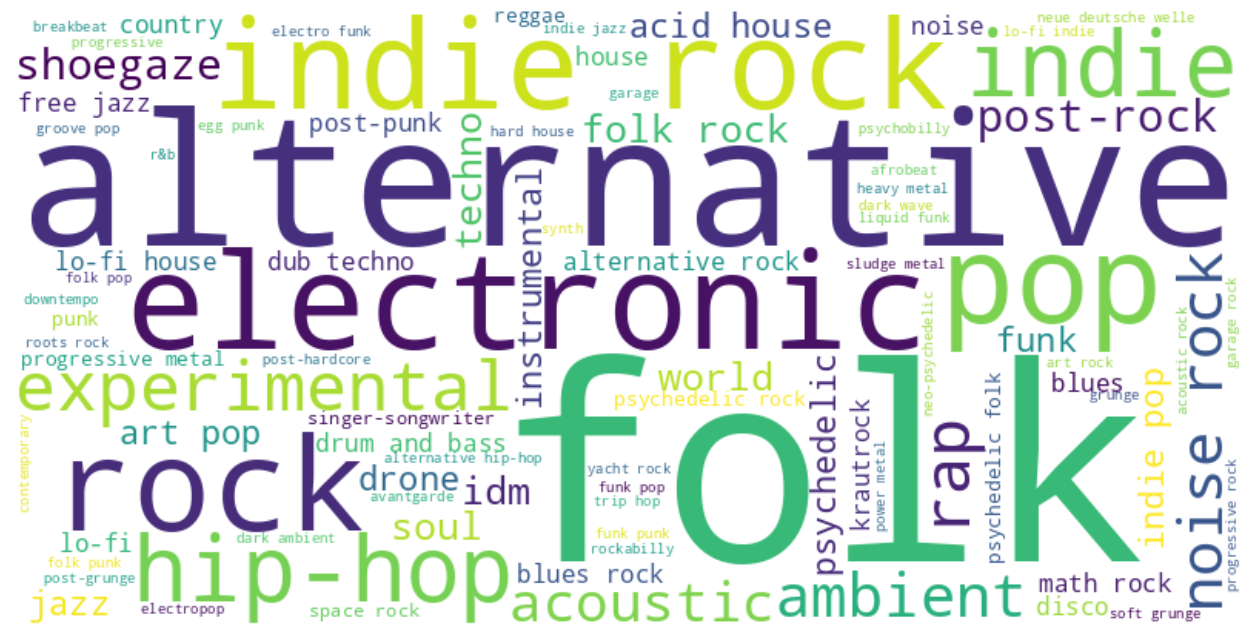

In [23]:
genres_dict = {}
for i in range(len(unique)):
    genres_dict[unique[i]] = counts[i]

wc = WordCloud(width=800, height=400, background_color="white")

wc.generate_from_frequencies(genres_dict)

plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

         Genres  Count
0          folk     23
1   alternative     20
2    electronic     13
3          rock     12
4    indie rock     11
5           pop     11
6       hip-hop      9
7         indie      9
8  experimental      8
9           rap      7


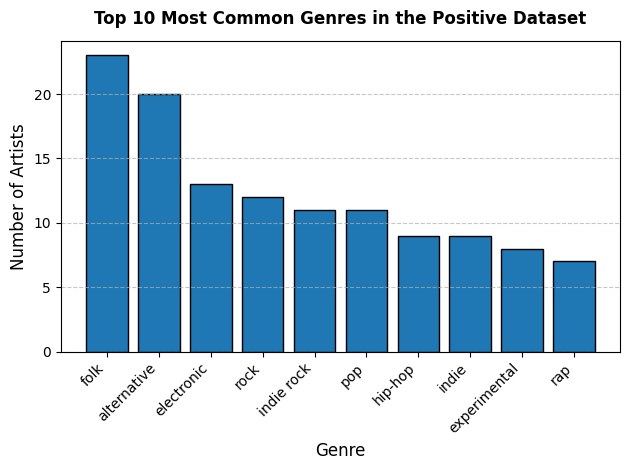

In [24]:
topten = sorted(genres_dict, key=genres_dict.get, reverse=True)[:10]
counts2 = np.asarray(sorted(counts, reverse=True)[:10])
topten_df = pd.DataFrame({"Genres": topten, "Count": counts2.astype(int)})
print(topten_df)

plt.bar(topten_df["Genres"], topten_df["Count"], edgecolor="black")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Artists", fontsize=12)
plt.xticks(rotation=45, horizontalalignment="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 10 Most Common Genres in the Positive Dataset", fontsize=12, weight="bold", pad=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

In [25]:
avg_popularity = df["Popularity"].mean()
avg_followers = df["Followers"].mean()

print(f"Mean popularity: {avg_popularity}")
print(f"Mean followers: {avg_followers}")

med_popularity = df["Popularity"].median()
med_followers = df["Followers"].median()

print(f"Median popularity: {med_popularity}")
print(f"Median followers: {med_followers}")

Mean popularity: 10.038461538461538
Mean followers: 67606.09615384616
Median popularity: 1.0
Median followers: 550.0


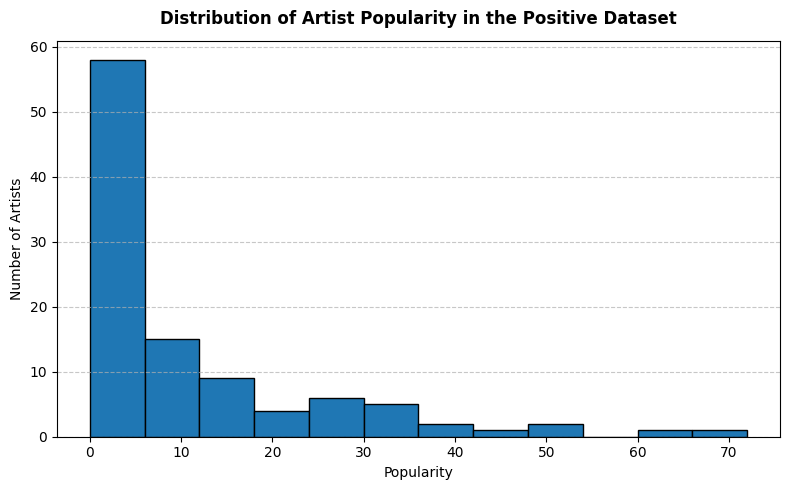

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df["Popularity"], bins=12, edgecolor="black")
plt.xlabel("Popularity")
plt.ylabel("Number of Artists")
plt.title("Distribution of Artist Popularity in the Positive Dataset", fontsize=12, weight="bold", pad=12)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Preprocessing for Machine Learning

In [37]:
# Returns second dataframe where unpopular genres are converted to "other"
def convert_genres(df, genres_list):
    df2 = df.copy()
    for genres in df2["Genres"]:
        for i in range(len(genres)):
            if genres[i] not in genres_list:
                genres[i] = "other"
    return df2

# Removes unnecessary columns from the original dataframe if they exist
def drop_columns(df, columns):
    if set(columns).issubset(df.columns):
        df.drop(columns=columns, inplace=True)
    
# Returns second dataframe where genres are a binary variable
# genres_list is a list with genre names to include minus "other"
def genres_as_columns(df, genres_list):
    df2 = df.copy()
    
    zeros = np.zeros(df2.shape[0])
    genres_list2 = genres_list + ["other"]

    for genre in (genres_list2):
        df2[genre] = zeros

    for i in range(df2.shape[0]):
        for genre in df2.at[i, "Genres"]:
            if genre in genres_list2:
                df2.at[i, genre] = 1.0
    
    df2.drop(columns=["Genres"], inplace=True)
    return df2

"""Positive dataframe"""

df2_positive = convert_genres(df, topten)

# Remove unneccesary columns
drop_columns(df2_positive, ["SpotifyId", "Image", "Name", "Date"])

df2_positive = genres_as_columns(df2_positive, topten)
df2_positive.insert(loc=0, column="left", value=np.ones(df2_positive.shape[0]))

print(df2_positive)

     left  Followers  Popularity  folk  alternative  electronic  rock  \
0     1.0    1316858          49   0.0          0.0         0.0   0.0   
1     1.0      27499          33   0.0          0.0         0.0   0.0   
2     1.0     122693          29   0.0          0.0         0.0   0.0   
3     1.0     188888          34   0.0          0.0         0.0   0.0   
4     1.0       1987           7   0.0          0.0         1.0   0.0   
..    ...        ...         ...   ...          ...         ...   ...   
99    1.0         56           0   0.0          1.0         0.0   1.0   
100   1.0        172           0   0.0          0.0         0.0   0.0   
101   1.0    2620607          72   0.0          0.0         0.0   0.0   
102   1.0         22           0   1.0          0.0         0.0   1.0   
103   1.0         47           0   1.0          1.0         0.0   0.0   

     indie rock  pop  hip-hop  indie  experimental  rap  other  
0           0.0  0.0      0.0    0.0           0.0  0.0   

In [38]:
"""Negative dataframe"""

df2_negative = convert_genres(df_negative, topten)
drop_columns(df2_negative, ["SpotifyId", "Name"])

df2_negative = genres_as_columns(df2_negative, topten)
df2_negative.insert(loc=0, column="left", value=np.zeros(df2_negative.shape[0]))

print(df2_negative)

       left  Popularity  Followers  folk  alternative  electronic  rock  \
0       0.0          45     168497   0.0          0.0         0.0   0.0   
1       0.0          28      23349   0.0          0.0         0.0   0.0   
2       0.0          58     259154   0.0          0.0         0.0   0.0   
3       0.0           4       1050   0.0          0.0         0.0   0.0   
4       0.0           4        316   0.0          0.0         0.0   0.0   
...     ...         ...        ...   ...          ...         ...   ...   
15022   0.0           0        155   0.0          0.0         0.0   0.0   
15023   0.0           9       1464   0.0          0.0         0.0   0.0   
15024   0.0          17       1092   0.0          0.0         0.0   0.0   
15025   0.0          16       4656   0.0          0.0         0.0   0.0   
15026   0.0           4        480   0.0          0.0         0.0   0.0   

       indie rock  pop  hip-hop  indie  experimental  rap  other  
0             0.0  0.0      0.0 

# Data analysis